In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
import numpy as np 
from PIL import Image, ImageDraw, ImageFont
import os
from scipy.spatial import distance
from random import randrange

size_x = 1280
size_y = 720
target_path =  'hd.jpg'


characters =[
    u"あ",
    u"い",
    u"う",  
    u"え",
    u"お",
    u"か",
    u"き",
    u"く",
    u"け",
    u"こ"
]

character_list = []
character_x = []
character_y = []
font_color_list = []


def open_image():
    print("open")
#     imgplot = plt.imshow(img)



    
def draw_one_image_random(result):
    x,y,w,h = random.randrange(size_x),random.randrange(size_y), random.randrange(10,300), random.randrange(10,300)
    img = Image.open(random.choice(components))
    if (x+w < size_x) and (y+h < size_y):
        resized = img.resize((w,h), Image.ANTIALIAS)
        result.paste(resized, (x, y, x+w, y+h))
        
def draw_one_character_random(result):

    cha = randrange(10)
    
    width=100
    height=100
    back_ground_color=(255,255,255)
    transparent = (0,0,0,0)
    #back_ground_color=(randrange(255),randrange(255),randrange(255))
    font_size=80
    font_color=(randrange(255),randrange(255),randrange(255))
    unicode_text =  characters[cha]
    character_list.append(cha)

    im  =  Image.new ( "RGBA", (width,height), transparent )
    draw  =  ImageDraw.Draw ( im )
    unicode_font = ImageFont.truetype("K_Gothic.ttf", font_size)
    draw.text ( (10,10), unicode_text, font=unicode_font, fill=font_color )
    im.save("japanese_character/0.png")
    img = Image.open("japanese_character/0.png")
    x,y,w,h = random.randrange(size_x),random.randrange(size_y), width, height
    character_x.append(x)
    character_y.append(y)   
    result.paste(img, (x, y, x+w, y+h), img)
    
def draw_one_character_from_list(result,i):

    cha = character_list[i]
    
    width=100
    height=100
    back_ground_color=(255,255,255)
    transparent = (0,0,0,0)
    #back_ground_color=(randrange(255),randrange(255),randrange(255))
    font_size=80
    color_int_1 = randrange(255)
    font_color=(color_int_1,randrange(255),randrange(255))
    font_color_list.append(color_int_1)
    unicode_text =  characters[cha]

    im  =  Image.new ( "RGBA", (width,height), transparent )
    draw  =  ImageDraw.Draw ( im )
    unicode_font = ImageFont.truetype("K_Gothic.ttf", font_size)
    draw.text ( (10,10), unicode_text, font=unicode_font, fill=font_color )
    im.save("japanese_character/0.png")
    img = Image.open("japanese_character/0.png")
    x,y,w,h = character_x[i],character_y[i], width, height
    result.paste(img, (x, y, x+w, y+h), img)


def mutate( init_pic = None):
    if init_pic == None:
        result = Image.new("RGBA", (size_x, size_y))
        for i in range(1000):
            draw_one_character_random(result)
    else:
        #result = init_pic.copy()
    #for i in range(100):
        #draw_one_image_random(result)
        #draw_one_character_random(result)
        result = Image.new("RGBA", (size_x, size_y))
        for i in range(1000):
            draw_one_character_from_list(result,i)
        
    return result

def save_to_file(result, path):
    result.save(os.path.expanduser(path))
    pil_im = Image.open(path)
    display(pil_im)

# result = mutate()
# display(result)

# result = mutate(result)
# display(result)

# result = mutate(result)
# display(result)

# save_to_file(result, "result.jpg")


In [2]:
import imagehash
#lesser better, because it is distance
def fitness(imga,imgb):
#     hash0 = imagehash.average_hash(Image.open('hd.jpg')) 
#     hash1 = imagehash.average_hash(Image.open('result.jpg')) 
    hash0 = imagehash.average_hash(imga) 
    hash1 = imagehash.average_hash(imgb) 
    return hash0-hash1


In [3]:
from numba import jit

@jit
def fitness2_helper(a,b):
    total = 0
    for i in range(size_y):
        for j in range(size_x):
            dst = 0
            for k in range(3):
                dst += (a[i][j][k] - b[i][j][k])**2
            total += (dst)**(1/2)
    return total

def fitness2(a,b):
    array_a = np.asarray(a)
    array_b = np.asarray(b)
    return fitness2_helper(array_a,array_b)


target_img = Image.open(target_path)
result_img = mutate()
# ss = np.asarray(target_img)
# print(ss[0][0])
# dst = distance.euclidean(ss[0][0], ss[100][100])
# print(dst)

#%time print(fitness2(result_img, target_img))


In [4]:
target_img = Image.open(target_path)

def init_first():
    #get first 100 child
    childs = []  
    for i in range(100):
        tmp = mutate()
        print(".",end="")
        childs.append(tmp)
    return childs

def get_fitness_score(generation):
    fitness_scores = []
    for i in generation:
        fitness_score = fitness2(i, target_img)
        fitness_scores.append(fitness_score)
    return fitness_scores
        
def run():
    generation = init_first()

    
def run_iterate(generation):
    fitness_scores = get_fitness_score(generation)
    sorted_index = np.argsort(fitness_scores)
    #choose best 20 from the generation
    bestX = sorted_index[:21]
    #save best one
    
    #every child generate 50 child
    new_generation = []
    
    #insert best 10 of itself
    for i in range(20):
        fitness_score = fitness(generation[bestX[i]], target_img)
        new_generation.append(generation[bestX[i]])
    
    for i in range(20):
        #mutate 5 time
        for j in range(5):
            print(".",end="")
            new_generation.append(mutate(generation[bestX[i]]))
    
    return new_generation
    #repeat
    
# run()

....................................................................................................best fitness :  220275162.50155315


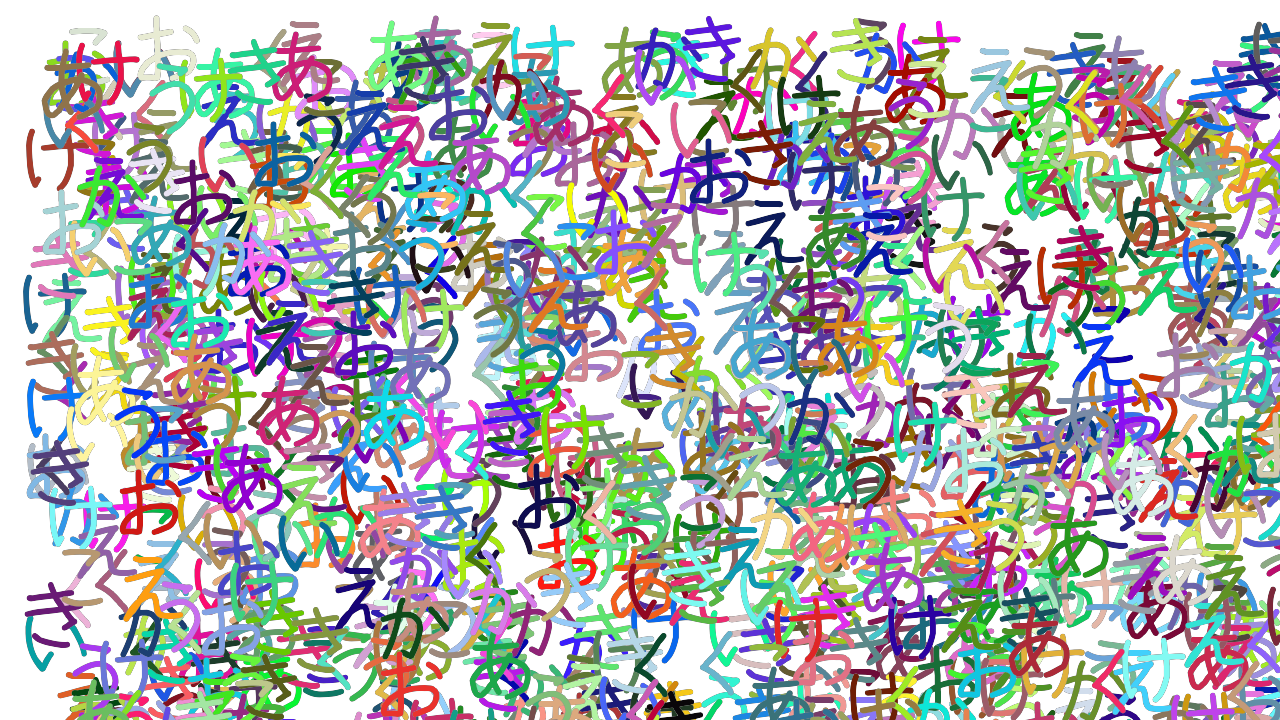

In [5]:
generation = init_first()
fitness_scores = get_fitness_score(generation)
sorted_index = np.argsort(fitness_scores)
print("best fitness : ",fitness_scores[sorted_index[0]])
display(generation[sorted_index[0]])

In [ ]:
# display(target_img)
# display(generation[sorted_index[0]])
for i in range(10):
    print("iterate : ",i)
    %time generation = run_iterate(generation)
    fitness_scores = get_fitness_score(generation)
    sorted_index = np.argsort(fitness_scores)
    print("best fitness : ",fitness_scores[sorted_index[0]])
    display(generation[sorted_index[0]])

In [ ]:
for i in range(20):
    print("iterate : ",10+i)
    generation = run_iterate(generation)
    fitness_scores = get_fitness_score(generation)
    sorted_index = np.argsort(fitness_scores)
    print("best fitness : ",fitness_scores[sorted_index[0]])
    display(generation[sorted_index[0]])

In [ ]:
for i in range(150):
    print("iterate : ",30+i)
    generation = run_iterate(generation)
    fitness_scores = get_fitness_score(generation)
    sorted_index = np.argsort(fitness_scores)
    print("best fitness : ",fitness_scores[sorted_index[0]])
    display(generation[sorted_index[0]])

In [ ]:
save_to_file(generation[sorted_index[0]], "result-150-gen.jpg")